# Capstone NLP 

# Define Project Objectives

Natural disasters can have a significant impact on people's lives, and social media has become an important source of information during such events. 

In this project, 

we aim to build a machine learning model that can `classify` tweets as `disaster-related or not`, based on their `text content`. 

We will use Natural Language Processing (NLP) techniques to `preprocess` and `analyze` the text, and `train` several machine learning models to `predict` the classification of each tweet. 

This project will provide an opportunity to apply NLP and machine learning techniques to a real-world problem and gain experience in data analysis, modeling, and interpretation. 

Data: https://www.kaggle.com/competitions/nlp-getting-started/data


# Data Acquisition

Data Importing

In [309]:
import pandas as pd

import training data

In [310]:
train_data = pd.read_csv(r"train.csv")
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [311]:
train_data = train_data.loc[:, ['text', 'target']]
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [312]:
train_data.tail()

,text,target
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1
7612,The Latest: More Homes Razed by Northern Calif...,1


# Data Exploration

In [313]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


get `Number of tokens`

In [315]:
train_data['no_tokens'] = train_data['text'].str.split().map(lambda token: len(token)) 
train_data.sample(10)

,text,target,no_tokens
1106,@QPR1980 @Rorington95 Nowt to do with money. F...,0,22
39,Ablaze for you Lord :D,0,5
7575,On the bright side I wrecked http://t.co/uEa0t...,0,7
1988,And here I was complaining about Phoenix Mode ...,0,25
2234,Vince McMahon once again a billionaire: I reme...,0,20
1995,Storm damage reported in West Tennessee http:/...,1,7
466,#volleyball Attack II Volleyball Training Mach...,1,12
898,You call them weekends. I call them Bloody Mar...,0,19
5507,Reddit's new content policy goes into effect m...,1,15
581,FedEx to stop transporting bioterror germs aft...,1,17


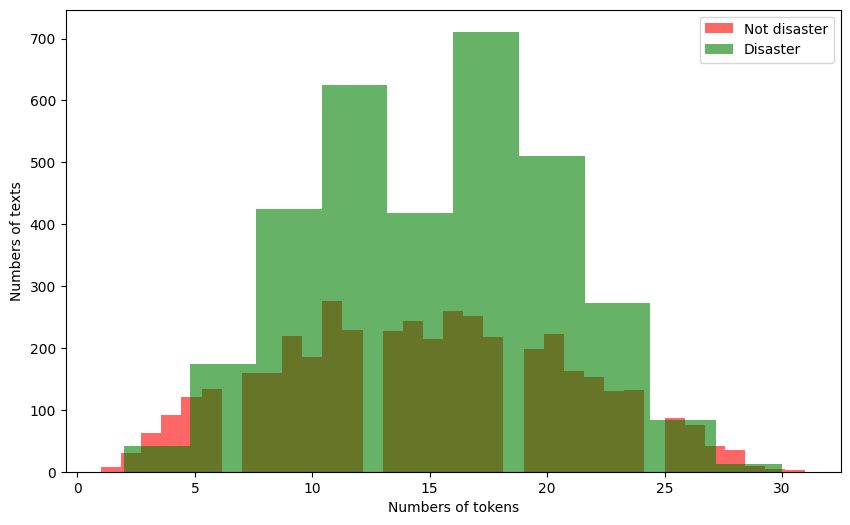

In [316]:
plt.figure(figsize=(10, 6)) 

train_data[train_data['target'] == 0]['no_tokens'].plot(bins=35, 
                                                kind='hist', 
                                                color='red', 
                                                label='Not disaster', 
                                                alpha=0.6)

train_data[train_data['target'] == 1]['no_tokens'].plot(kind='hist', 
                                                color='green', 
                                                label='Disaster', 
                                                alpha=0.6)

plt.legend(loc='upper right')
plt.xlabel("Numbers of tokens")
plt.ylabel("Numbers of texts")
plt.show()

The most distribution of `Not disaster` are range `14 to 16` tokens.

The most distribution of `Disaster` are range `12 to 20` tokens.

`Average token` length in a text

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py

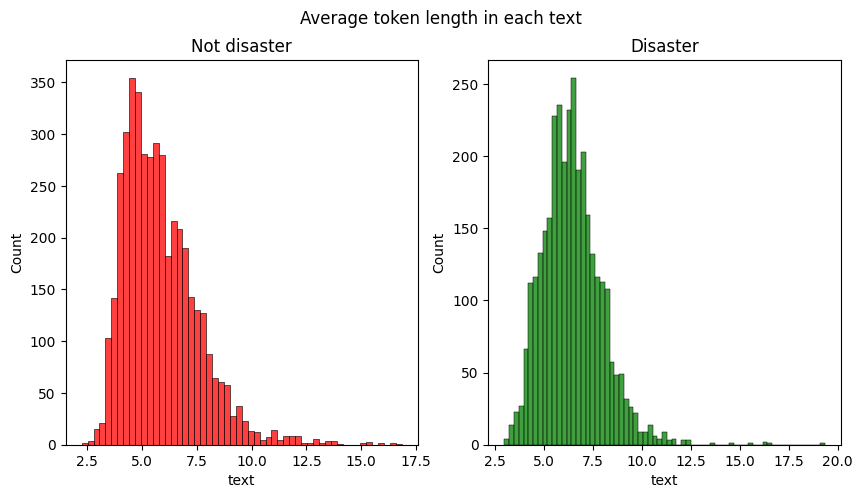

In [317]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(10,5))

avg_tokens= train_data[train_data['target'] == 0]['text'].str.split().apply(lambda token : [len(char) for char in token]).map(lambda x: np.mean(x))
sns.histplot(avg_tokens, ax=ax1, color='red')
ax1.set_title('Not disaster')

avg_tokens= train_data[train_data['target'] == 1]['text'].str.split().apply(lambda token : [len(char) for char in token]).map(lambda x: np.mean(x))
sns.histplot(avg_tokens, ax=ax2, color='green')
ax2.set_title('Disaster')

fig.suptitle('Average token length in each text')
plt.show()

The most distribution of `Not disaster` are average `4 to 8` text.

The most distribution of `Disaster` are average `12 to 20` text.

# Data Preparation

In [318]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

Missing data

In [319]:
train_data.isnull().sum()

text         0
target       0
no_tokens    0
dtype: int64

Noise Removal

In [320]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [321]:
len(stop_words)

179

Excluding some useful words from stop words list|

In [322]:
excluding= ['againts','no' ,'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
            "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn', 
            "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't", 
            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words= [word for word in stop_words if word not in excluding]
len(stop_words)

143

word normalization

In [323]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [324]:
def preprocessing_data(texts):
    cleaned_texts = []  

    for sent in texts: 
        filtered_sent = []
        sent_no_links = re.sub(r'http[s]?://[^\s]+', '', sent) 
        tokens = word_tokenize(sent_no_links.lower())
        
        for token in tokens:
            token = re.sub(r'\W', '', token)
            if (not token.isnumeric()) and (len(token) > 2) and (token not in stop_words):
                filtered_sent.append(lemmatizer.lemmatize(stemmer.stem(token)))
                
        text = " ".join(filtered_sent)
        cleaned_texts.append(text)
    
    return cleaned_texts

In [325]:
train_data['text'].values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [326]:
train_data['clean_text'] = preprocessing_data(train_data['text'].values)
train_data.head()

,text,target,no_tokens,clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,13,deed reason earthquak may allah forgiv
1,Forest fire near La Ronge Sask. Canada,1,7,forest fire near rong sask canada
2,All residents asked to 'shelter in place' are ...,1,22,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",1,8,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,16,got sent photo rubi alaska smoke wildfir pour ...


In [327]:
train_data['text'].iloc[4187]

'Road Hazard @ CASCADE RD SW / CHILDRESS DR SW http://t.co/DilyvRoWyJ'

In [328]:
train_data['clean_text'].iloc[4187]

'road hazard cascad childress'

In [329]:
train_data['text'].iloc[4945]

"Deepak Chopra's EPIC Twitter Meltdown http://t.co/ethgAGPy5G"

In [330]:
train_data['clean_text'].iloc[4945]

'deepak chopra epic twitter meltdown'

imbalance target 

In [331]:
train_data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [332]:
train_data['target'].value_counts(normalize=True)

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

plot imbalance between classes

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


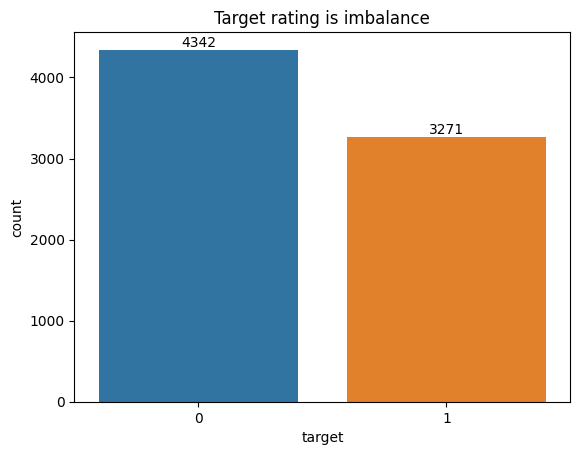

In [333]:
ax= sns.countplot(x=train_data['target'],
                  data=train_data)

for p in ax.patches:
    x= p.get_bbox().get_points()[:,0] 
    y= p.get_bbox().get_points()[1,1]
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom')
    
plt.title("Target rating is imbalance")
plt.show()

handel imbalanced classes

In [334]:
from sklearn.utils import shuffle, resample

In [335]:
df2 = train_data

not_disaster_data = train_data[train_data['target'] == 0]
disaster_data = train_data[train_data['target'] == 1]
disaster_data = resample(disaster_data, replace=True, n_samples=len(not_disaster_data))

df2 = pd.concat([not_disaster_data, disaster_data], axis=0)

balanced_train_data = shuffle(df2)

print("Number of rows after upsampling: \nNot Disaster Data:", len(balanced_train_data[balanced_train_data["target"] == 0]), 
      "\nDisaster Data:", len(balanced_train_data[balanced_train_data["target"] == 1]))

Number of rows after upsampling: 
Not Disaster Data: 4342 
Disaster Data: 4342


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


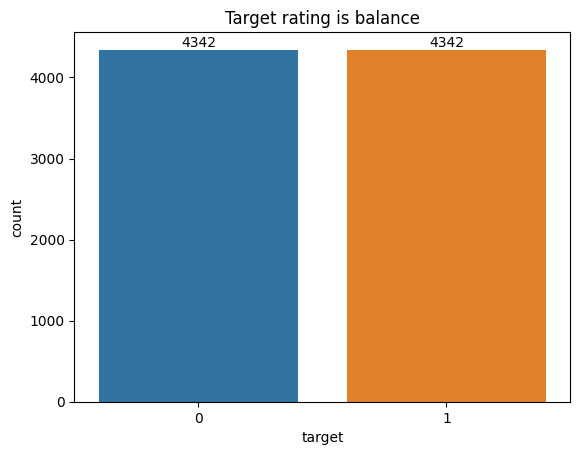

In [336]:
ax= sns.countplot(x=balanced_train_data['target'],
                  data=balanced_train_data)

for p in ax.patches:
    x= p.get_bbox().get_points()[:,0] 
    y= p.get_bbox().get_points()[1,1]
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom')
    
plt.title("Target rating is balance")
plt.show()

split data

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
balanced_train_data.head()

,text,target,no_tokens,clean_text
3799,when a monster truck racer catches on fire at ...,1,11,monster truck racer catch fire fair
7413,One man fatally shot another wounded on Vermon...,1,12,one man fatal shot anoth wound vermont street ...
2758,Classic WWW ÛÓ Hiroshima/Nagasaki: Atomic Dev...,1,17,classic www hiroshimanagasaki atom devast hidd...
342,Paul Craig Roberts ÛÒ Vladimir Putin Issues M...,1,21,paul craig robert vladimir putin issu major wa...
3148,UPDATE: Indiana State Police reopening I-65 ne...,1,20,updat indiana state polic reopen i65 near lafa...


In [339]:
X_train, X_val, y_train, y_val = train_test_split(balanced_train_data['clean_text'], balanced_train_data['target'], test_size=0.2, random_state=7)

In [340]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(6947,)
(1737,)
(6947,)
(1737,)


# Build Pipline for TfidfVectorizer and Naive bayes

In [341]:
from sklearn.pipeline import Pipeline

apply vectorization

In [342]:
from sklearn.feature_extraction.text import TfidfVectorizer


apply model

In [343]:
from sklearn.naive_bayes import MultinomialNB


In [344]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

apply grid search for hyperparameters

In [345]:
from sklearn.model_selection import GridSearchCV

define new hyperparameters 

In [346]:
params = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 5],
    'nb__alpha': [0.1, 0.5, 1.0],
}

get the best hyperparameters

In [347]:
grid_search = GridSearchCV(estimator= pipeline, 
                           param_grid= params, 
                           cv= 5)

fit grid search 

In [348]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 0.5, 1.0],
                         'tfidf__max_df': [0.5, 0.75, 1.0],
                         'tfidf__min_df': [1, 2, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]})

params for each iteration

In [349]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nb__alpha,param_tfidf__max_df,param_tfidf__min_df,param_tfidf__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087940,0.012652,0.019075,0.006447,0.1,0.5,1,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.843885,0.843165,0.832973,0.830094,0.835853,0.837194,0.005486,10
1,0.245527,0.026184,0.032361,0.003786,0.1,0.5,1,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.850360,0.841727,0.842333,0.847372,0.839453,0.844249,0.004003,1
2,0.088126,0.040720,0.021289,0.005895,0.1,0.5,2,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.818705,0.808633,0.811375,0.816415,0.825774,0.816180,0.005975,28
3,0.148330,0.020498,0.028984,0.003807,0.1,0.5,2,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.820144,0.815108,0.816415,0.824334,0.825774,0.820355,0.004202,19
4,0.061608,0.008843,0.013415,0.003716,0.1,0.5,5,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.792086,0.811511,0.785457,0.791937,0.801296,0.796457,0.009062,40
5,0.123477,0.011339,0.027578,0.003569,0.1,0.5,5,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid...",0.789209,0.802878,0.786177,0.798416,0.794816,0.794299,0.006045,52
6,0.089909,0.005835,0.019851,0.002303,0.1,0.75,1,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfi...",0.843885,0.843165,0.832973,0.830094,0.835853,0.837194,0.005486,10
7,0.181892,0.036287,0.025882,0.010286,0.1,0.75,1,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfi...",0.850360,0.841727,0.842333,0.847372,0.839453,0.844249,0.004003,1
8,0.067306,0.007764,0.015265,0.001724,0.1,0.75,2,"(1, 1)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfi...",0.818705,0.808633,0.811375,0.816415,0.825774,0.816180,0.005975,28
9,0.141955,0.016418,0.023499,0.008522,0.1,0.75,2,"(1, 2)","{'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfi...",0.820144,0.815108,0.816415,0.824334,0.825774,0.820355,0.004202,19


best hyperparameters

In [350]:
best_params = grid_search.best_params_
best_params

{'nb__alpha': 0.1,
 'tfidf__max_df': 0.5,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 2)}

best score

In [351]:
best_score = grid_search.best_score_*100
best_score

84.4248799664372

# Model Training machine learning

In [352]:
from sklearn.naive_bayes import MultinomialNB

In [353]:
model_nb = Pipeline([
    (
        'tfidf', TfidfVectorizer(ngram_range=grid_search.best_params_['tfidf__ngram_range'],
                              max_df=grid_search.best_params_['tfidf__max_df'],
                              min_df=grid_search.best_params_['tfidf__min_df'])
     ),

    (
        'nb', MultinomialNB(alpha=grid_search.best_params_['nb__alpha'])
     )

])

In [354]:
model_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))),
                ('nb', MultinomialNB(alpha=0.1))])

# Model Evaluation

In [355]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [356]:
y_pred = model_nb.predict(X_val)

accuracy score

In [357]:
accuracy = accuracy_score(y_val, y_pred)
accuracy*100

85.60736902705814

classification report

In [358]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       857
           1       0.83      0.89      0.86       880

    accuracy                           0.86      1737
   macro avg       0.86      0.86      0.86      1737
weighted avg       0.86      0.86      0.86      1737



confusion matrix

In [359]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[700, 157],
       [ 93, 787]], dtype=int64)

plot heatmap for confusion matrix

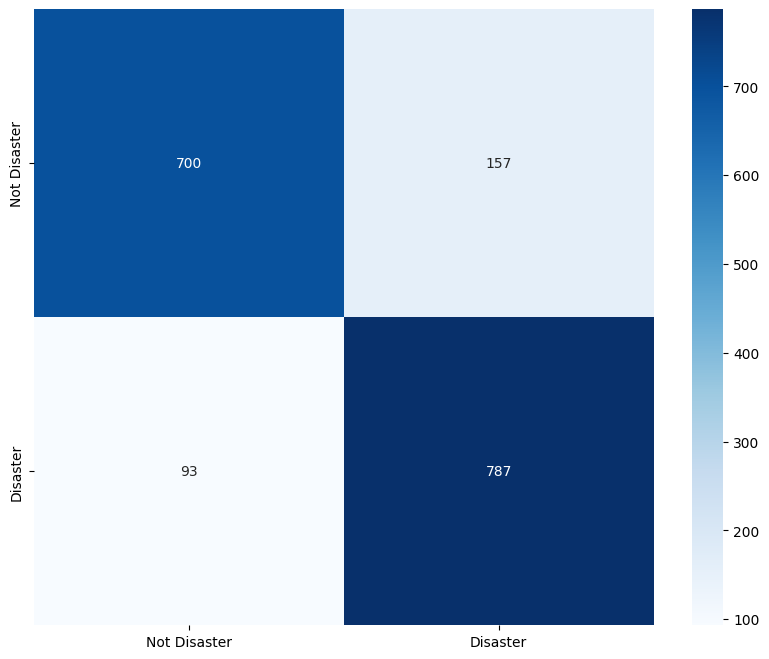

In [360]:
plt.figure(figsize=(10,8))
labels = ['Not Disaster', 'Disaster']
sns.heatmap(cm,
            xticklabels=labels, 
            yticklabels=labels,
            annot= True,
            cmap= 'Blues',
            fmt= 'g')
plt.show()

# Save Model Naive bayes

In [361]:
import joblib

In [362]:
joblib.dump(model_nb, 'model_nb.pkl')

['model_nb.pkl']

# pretrained model using API

In [363]:
import requests

https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english?text=I+like+you.++good

https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student?text=this+is+bad

In [364]:
API_TOKEN = "your_key"
model_url = "distilbert-base-uncased-finetuned-sst-2-english"
# model_url = "lxyuan/distilbert-base-multilingual-cased-sentiments-student"

In [365]:
def query(prompt, model_url):
    API_URL = f"https://api-inference.huggingface.co/models/{model_url}"
    headers = {"Authorization": f"Bearer {API_TOKEN}"}
    payload = {"inputs": prompt}
    response = requests.post(API_URL, 
                             headers=headers, 
                             json=payload)

    label = response.json()[0][0]['label']
    score = response.json()[0][0]['score']
    return label, score

In [366]:
# response = [[{'label': 'POSITIVE', 'score': 0.9998738765716553},
#   {'label': 'NEGATIVE', 'score': 0.00012611268903128803}]]

# label = x[0][0]['label']
# score = x[0][0]['score']

# Load pretrainded model 

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Deep learning using LSTM model

In [367]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, layers, optimizers, losses


preprocessing data

In [368]:
def preprocess_for_lstm(x_train, x_val, max_words=5000, max_len=100):
    """
    Preprocess text data for LSTM model.

    Parameters:
    - x_train: Training text data
    - x_val: Testing text data
    - max_words: Maximum number of words to be used in tokenization
    - max_len: Maximum length of sequences after padding

    Returns:
    - Tuple of preprocessed training and testing data (x_train_pad, x_test_pad, tokenizer)
    """

    # Tokenize the text data for  pass them to LSTM model
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(x_train)
    total_words = len(tokenizer.word_index) + 1

    # Convert text to sequences and pad them
    x_train_seq = tokenizer.texts_to_sequences(x_train)
    x_val_seq = tokenizer.texts_to_sequences(x_val)

    x_train_pad = pad_sequences(x_train_seq, maxlen=max_len)
    x_val_pad = pad_sequences(x_val_seq, maxlen=max_len)

    return x_train_pad, x_val_pad, tokenizer, total_words

x_train_pad, x_val_pad, tokenizer, total_words = preprocess_for_lstm(X_train, X_val)


Build LSTM Model

In [369]:
model_lstm = models.Sequential()
model_lstm.add(layers.Embedding(total_words,
                                output_dim=64))
model_lstm.add(layers.LSTM(100))
model_lstm.add(layers.Dropout(0.2))
model_lstm.add(layers.Flatten())
model_lstm.add(layers.Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer= optimizers.Adam(),
                   loss= losses.binary_crossentropy,
                   metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 64)          747648    
                                                                 
 lstm_9 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 flatten_9 (Flatten)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 813749 (3.10 MB)
Trainable params: 813749 (3.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train LSTM model

In [370]:
model_lstm.fit(x_train_pad,
               y_train,
               validation_data=(x_val_pad, y_val), 
               epochs=5, 
               batch_size=32)

Epoch 1/5


218/218 [==============================] - 17s 68ms/step - loss: 0.4937 - accuracy: 0.7554 - val_loss: 0.3890 - val_accuracy: 0.8267
Epoch 2/5
218/218 [==============================] - 14s 66ms/step - loss: 0.2791 - accuracy: 0.8894 - val_loss: 0.3660 - val_accuracy: 0.8446
Epoch 3/5
218/218 [==============================] - 15s 67ms/step - loss: 0.1979 - accuracy: 0.9269 - val_loss: 0.3905 - val_accuracy: 0.8538
Epoch 4/5
218/218 [==============================] - 15s 68ms/step - loss: 0.1556 - accuracy: 0.9457 - val_loss: 0.3981 - val_accuracy: 0.8561
Epoch 5/5
218/218 [==============================] - 15s 68ms/step - loss: 0.1286 - accuracy: 0.9535 - val_loss: 0.4509 - val_accuracy: 0.8538


Evaluate LSTM model 

In [371]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [372]:
y_pred_lstm= model_lstm.predict(x_val_pad)
y_pred_lstm

55/55 [==============================] - 2s 18ms/step


array([[0.9998726 ],
       [0.05751383],
       [0.999997  ],
       ...,
       [0.7026033 ],
       [0.01370114],
       [0.9999937 ]], dtype=float32)

In [373]:
import numpy as np

In [374]:
y_pred_lstm = np.round(y_pred_lstm)
y_pred_lstm

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [375]:
accuracy_lstm = accuracy_score(y_val, y_pred_lstm)
print(f"LSTM Model Accuracy: {accuracy_lstm*100:.2f}%")

LSTM Model Accuracy: 85.38%


In [376]:
cr = classification_report(y_val, np.round(y_pred_lstm))
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       857
           1       0.85      0.87      0.86       880

    accuracy                           0.85      1737
   macro avg       0.85      0.85      0.85      1737
weighted avg       0.85      0.85      0.85      1737



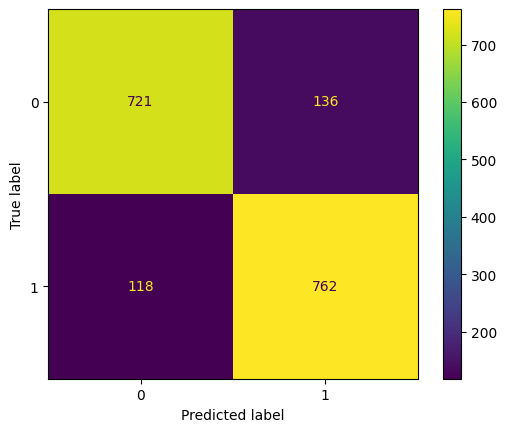

In [377]:
cm = confusion_matrix(y_val, np.round(y_pred_lstm))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

Save LSTM model 

In [378]:
model_lstm.save("model_lstm.h5")

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Test new data

load data

In [379]:
test_data = pd.read_csv(r'test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [380]:
test_data = test_data.loc[:, ['text']]
test_data.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [381]:
test_data.tail()

,text
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,#CityofCalgary has activated its Municipal Eme...


preprocessing data 

In [382]:
test_data['clean_text'] = preprocessing_data(test_data['text'].values)
test_data.head()

,text,clean_text
0,Just happened a terrible car crash,happen terribl car crash
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gee flee across street n...
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


Naive Bayes

In [384]:
test_data['preds_nb'] = model_nb.predict(test_data['clean_text'])
test_data['prob_nb'] = model_nb.predict_proba(test_data['clean_text'])[:, 1]

In [385]:
test_data['preds_nb']

0       1
1       1
2       1
3       1
4       1
       ..
3258    0
3259    1
3260    1
3261    1
3262    1
Name: preds_nb, Length: 3263, dtype: int64

In [386]:
test_data['prob_nb']

0       0.759310
1       0.770017
2       0.951587
3       0.801003
4       0.997280
          ...   
3258    0.497019
3259    0.604979
3260    0.973673
3261    0.995976
3262    0.996943
Name: prob_nb, Length: 3263, dtype: float64

In [387]:
test_data.head()

,text,clean_text,preds_nb,prob_nb
0,Just happened a terrible car crash,happen terribl car crash,1,0.759310
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon,1,0.770017
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gee flee across street n...,1,0.951587
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir,1,0.801003
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1,0.997280


Pretrained model

prepaire data before passing to model

In [388]:
clean_text_list = test_data['clean_text'].tolist()

In [389]:
test_data['preds_hf'], test_data['prob_hf'] = query(clean_text_list, 
                                                    model_url)

In [390]:
test_data['preds_hf']

0       NEGATIVE
1       NEGATIVE
2       NEGATIVE
3       NEGATIVE
4       NEGATIVE
          ...   
3258    NEGATIVE
3259    NEGATIVE
3260    NEGATIVE
3261    NEGATIVE
3262    NEGATIVE
Name: preds_hf, Length: 3263, dtype: object

In [391]:
test_data['prob_hf']

0       0.999121
1       0.999121
2       0.999121
3       0.999121
4       0.999121
          ...   
3258    0.999121
3259    0.999121
3260    0.999121
3261    0.999121
3262    0.999121
Name: prob_hf, Length: 3263, dtype: float64

In [392]:
test_data.head()

,text,clean_text,preds_nb,prob_nb,preds_hf,prob_hf
0,Just happened a terrible car crash,happen terribl car crash,1,0.759310,NEGATIVE,0.999121
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon,1,0.770017,NEGATIVE,0.999121
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gee flee across street n...,1,0.951587,NEGATIVE,0.999121
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir,1,0.801003,NEGATIVE,0.999121
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1,0.997280,NEGATIVE,0.999121


In [393]:
test_data['preds_hf'].value_counts()

preds_hf
NEGATIVE    3263
Name: count, dtype: int64

LSTM model

prepaire data before passing to model

In [394]:
x_test_seq = tokenizer.texts_to_sequences(test_data['clean_text'])
x_test_pad = pad_sequences(x_test_seq, maxlen=100)

In [395]:
preds_lstm_model = model_lstm.predict(x_test_pad)
test_data['preds_lstm'] = np.round(preds_lstm_model)
test_data['prob_lstm'] = preds_lstm_model

 39/102 [==========>...................] - ETA: 2s

102/102 [==============================] - 4s 40ms/step


In [396]:
test_data.head()

,text,clean_text,preds_nb,prob_nb,preds_hf,prob_hf,preds_lstm,prob_lstm
0,Just happened a terrible car crash,happen terribl car crash,1,0.759310,NEGATIVE,0.999121,1.0,0.850921
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon,1,0.770017,NEGATIVE,0.999121,1.0,0.733995
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gee flee across street n...,1,0.951587,NEGATIVE,0.999121,0.0,0.288071
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir,1,0.801003,NEGATIVE,0.999121,1.0,0.798540
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1,0.997280,NEGATIVE,0.999121,1.0,0.999936
